In [1]:
import pandas as pd
import os

from utils.constants import (
    DATASETS_PATH,
    CATEGORICAL_FEATURES,
    CONTINUOUS_FEATURES,
)

df = pd.read_csv(os.path.join(DATASETS_PATH,'dataset.csv'))

# Encode dataset
features_labels = {}
features_dims = {}

for feature in CATEGORICAL_FEATURES:
    encoding = {name: value for (value, name) in enumerate(df[feature].unique())}
    features_labels[feature] = {value: name for (value, name) in enumerate(df[feature].unique())}
    df[feature] = df[feature].apply(lambda x: encoding[x])
    features_dims[feature] = len(df[feature].unique())

features_scale = {}

for feature in CONTINUOUS_FEATURES:

    max_ = df[feature].max()

    df[feature] = df[feature].apply(lambda x: float(x)/max_)
    features_scale[feature] = max_

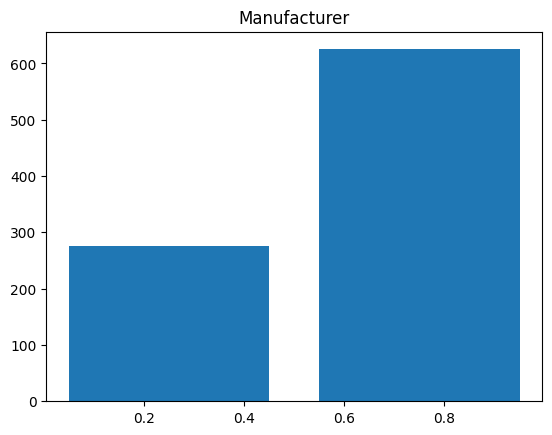

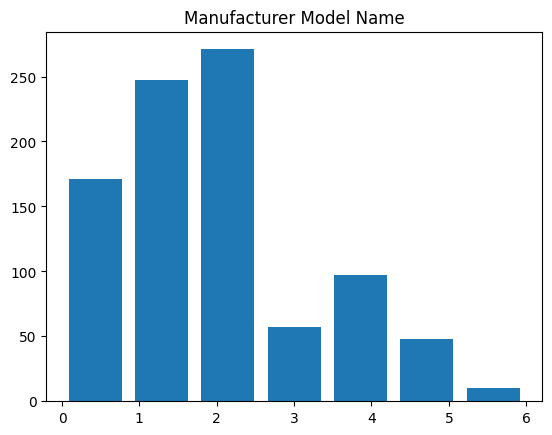

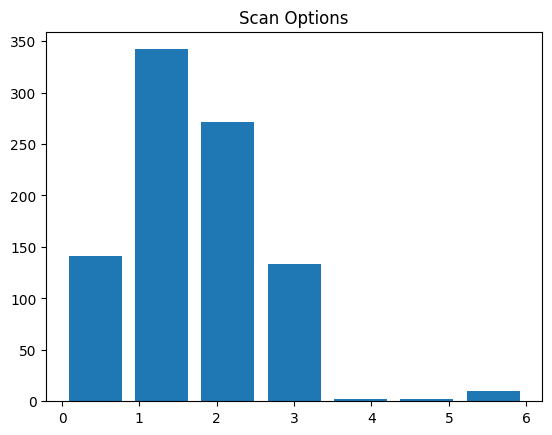

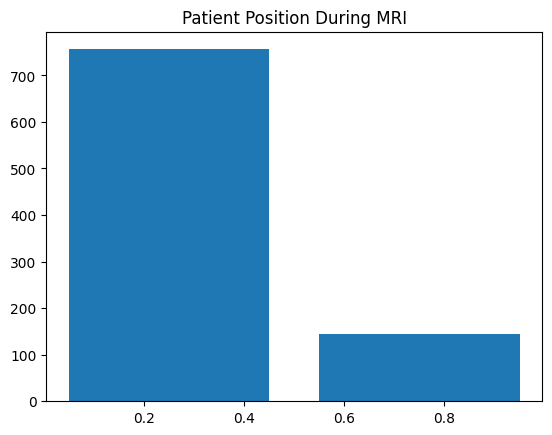

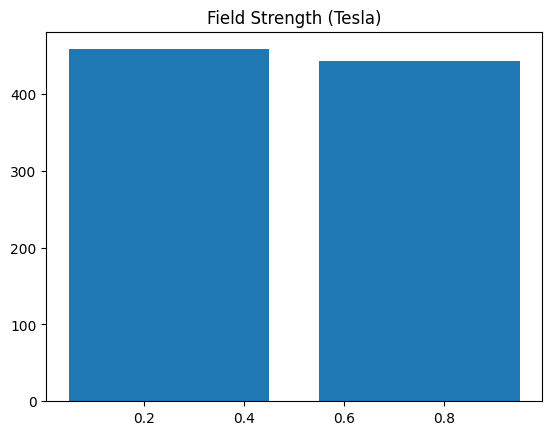

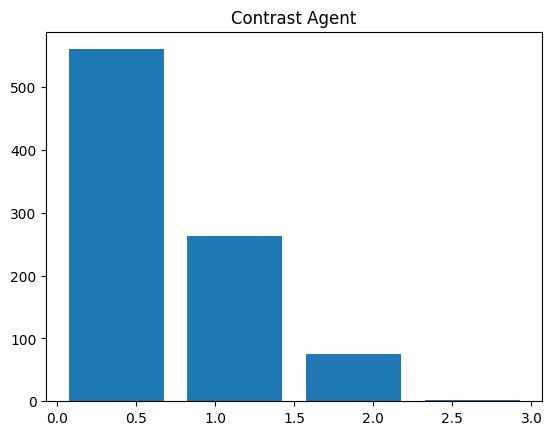

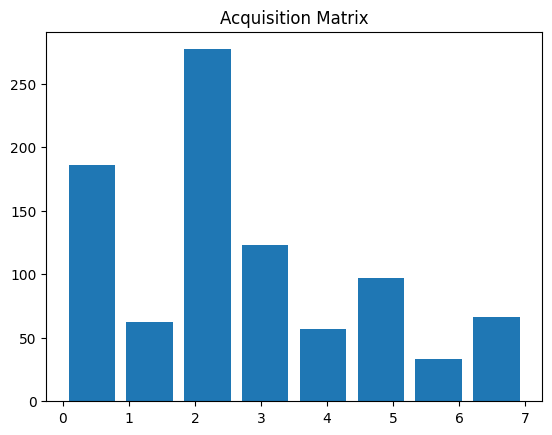

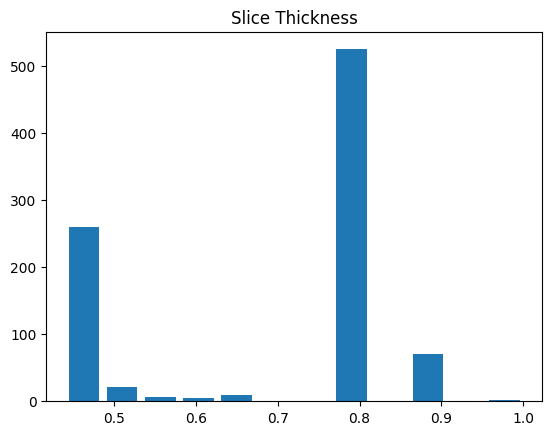

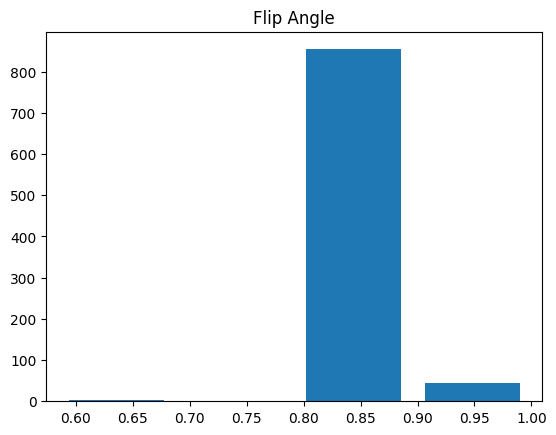

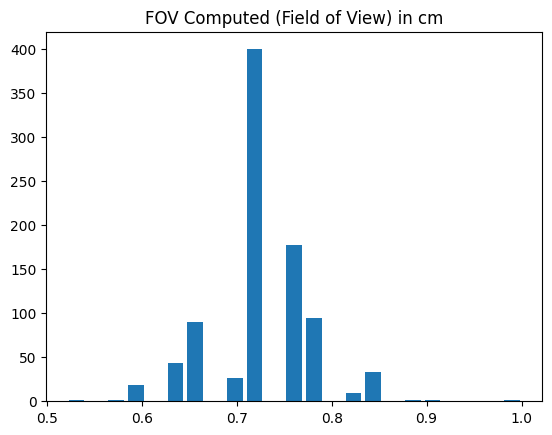

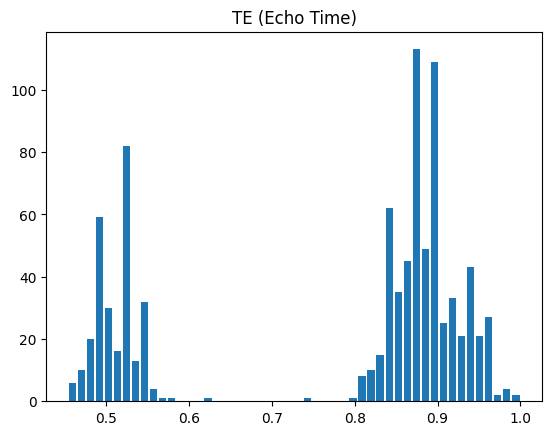

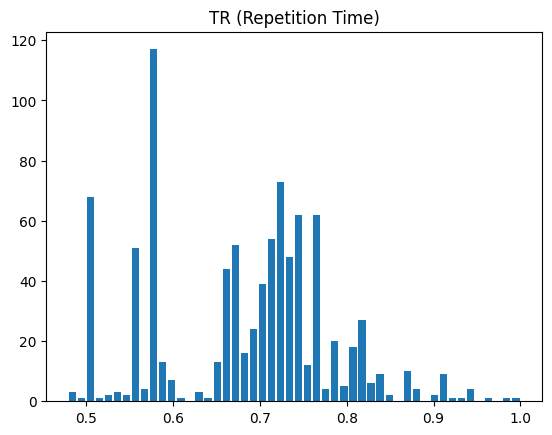

In [2]:
for feature in df[CATEGORICAL_FEATURES+CONTINUOUS_FEATURES].columns:
    df[['Patient ID',feature]].groupby('Patient ID').min().hist(rwidth=0.8, grid=False, bins=min(len(df[feature].unique()),50))